# Datacamp Data Analyst Associate Practical Exam Submission

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


## Task 1

### a. State whether the values match the description

In [221]:
df = pd.read_csv('food_claims_2212.csv')
df.head()


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


- Column **number of claims** does not match the description. As per the description, the data type of the column should be **continuous** but the value of the column indicates that there is a **currency symbol** in front of the claim values

### b. State the number of missing values in the column.

In [222]:
df_Null = df.isna().sum().sort_values()
df_Null.drop(df_Null.loc[df_Null == 0].index, inplace=True)


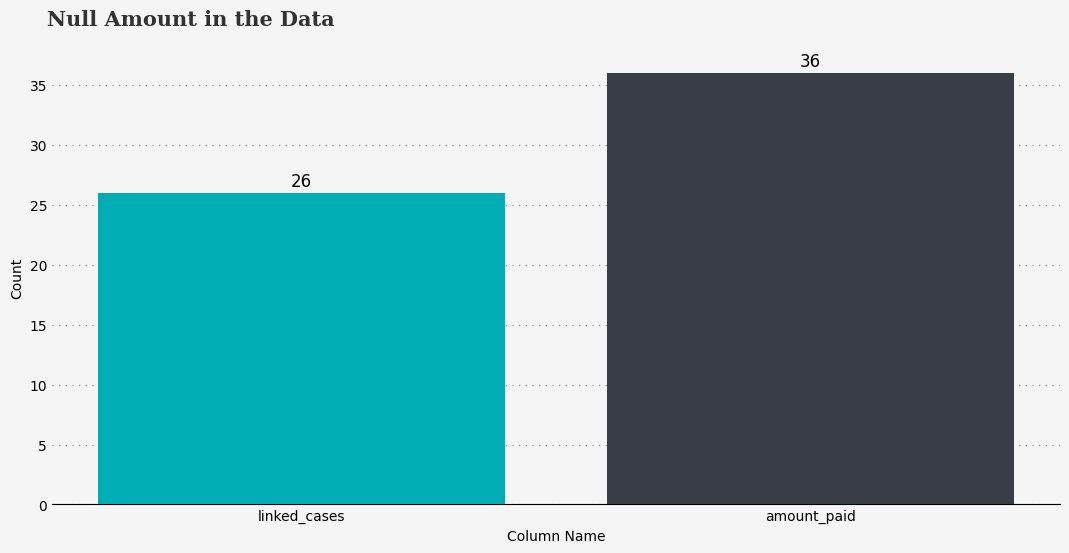

In [223]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')

x = np.arange(1, len(df_Null)+1)
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
ax.bar(x, height=df_Null, color=["#00ADB5", '#393E46'], zorder=3)
ax.set_xticks(x)
ax.set_xticklabels(df_Null.index)

ax.set_ylabel('Count')
ax.set_xlabel('Column Name')

ax.text(0.5, 40, 'Null Amount in the Data', fontsize=15,
        fontweight='bold', fontfamily='serif', color="#323232")

for i, j in enumerate(df_Null):
    ax.annotate(f'{j}', xy=(i+1, j+1), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)

locals()["ax"].tick_params(length=0)


- There were **2 columns** that has null values in it. Which is **liked_cases** and **amount_paid** column
- **amount_paid** column has higher null amount than linked_cases column

We can replace the missing value as per instruction:
- **amount_paid** -> Replace with median
- **liked_cases** -> Replace with FALSE

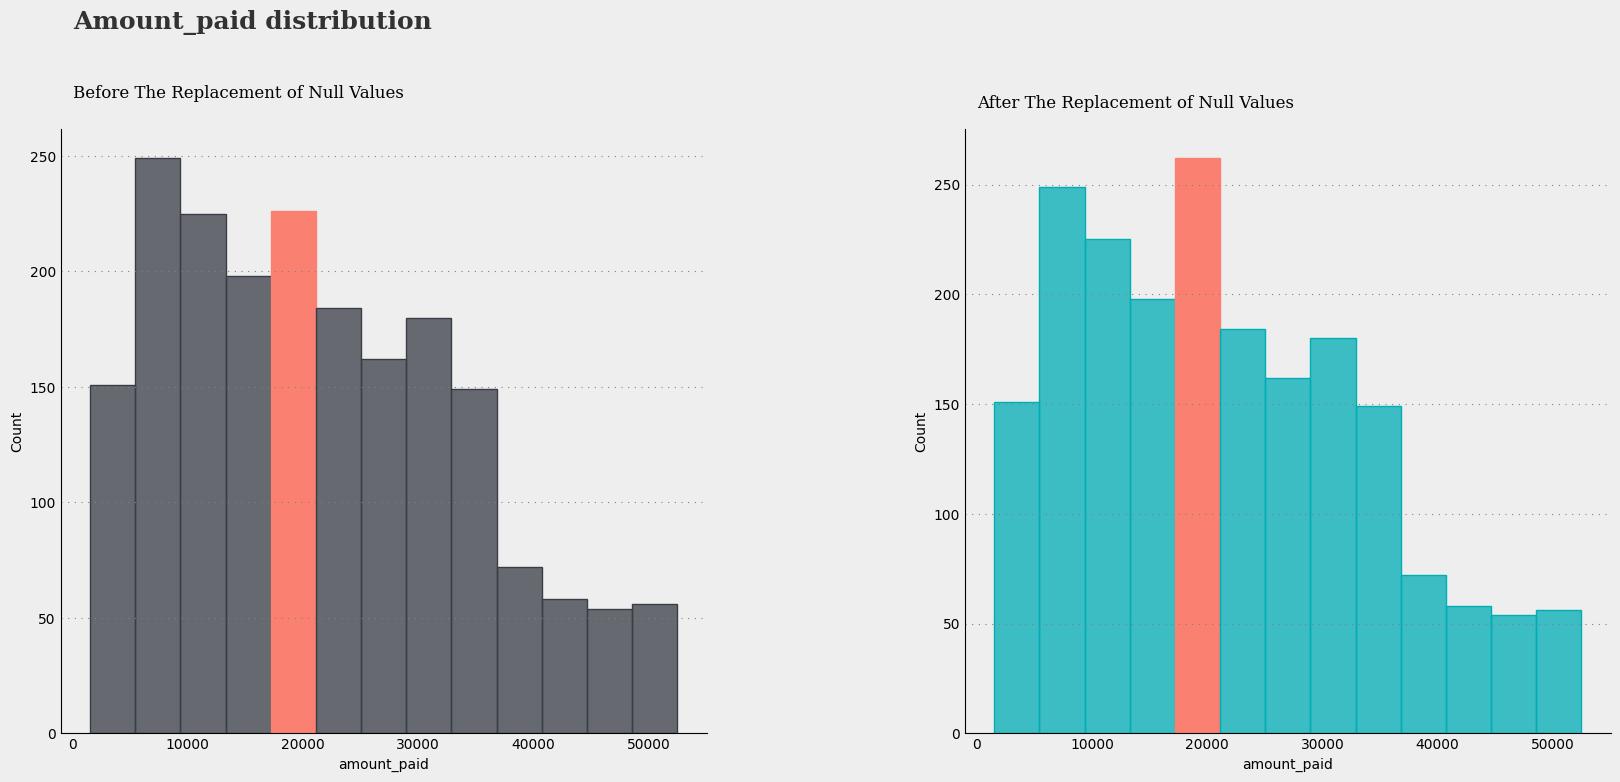

In [224]:
fig = plt.figure(figsize=(20, 8), dpi=100)

fig.patch.set_facecolor('#EEEEEE')
palette = ["#00ADB5", '#393E46']

gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


# AX0 (Histogram before null replace)
ax0.text(1, 305, 'Amount_paid distribution', fontsize=18,
         fontweight='bold', fontfamily='serif', color="#323232")
ax0.text(1, 275, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax0.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist1 = sns.histplot(data=df, x="amount_paid", ax=ax0,
             color=palette[1],  bins=13, edgecolor=palette[1])
hist1.patches[4].set_facecolor('salmon')
hist1.patches[4].set_edgecolor('salmon')


# AX1 (Histogram after null replace)
ax1.text(1, 285, 'After The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
# Replace Null
df['amount_paid'].fillna(df['amount_paid'].median(), inplace=True)
ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
hist2 = sns.histplot(data=df, x="amount_paid", ax=ax1,
             color=palette[0],  bins=13, edgecolor=palette[0])
hist2.patches[4].set_facecolor('salmon')
hist2.patches[4].set_edgecolor('salmon')


for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].set_facecolor('#EEEEEE')
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


- Take a closer look at the highlighted bar, the count **increased** when we replace the null value with the **median** of the column. So we can conclude that the **median** is around **20000**. Here is the boxplot for the validation

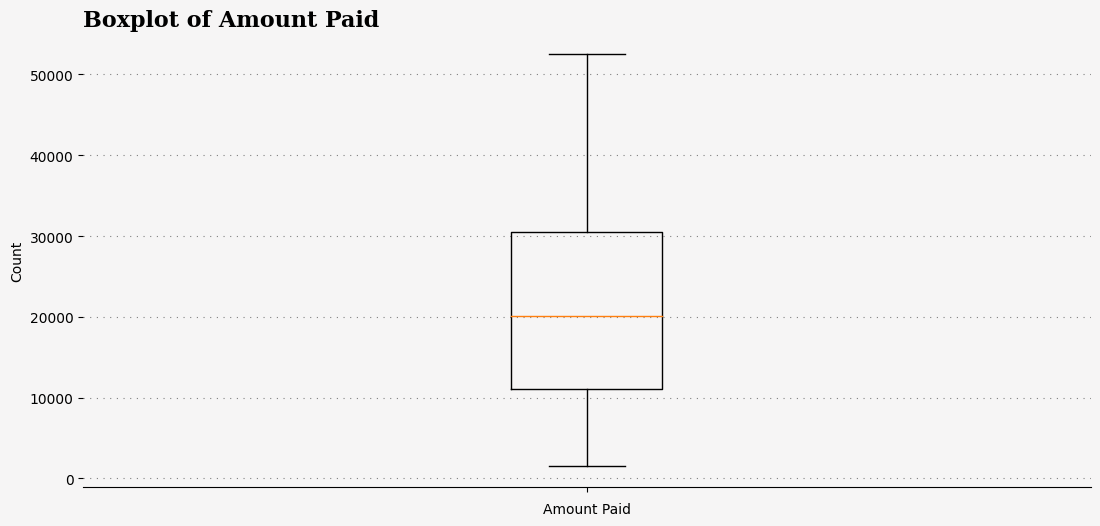

In [225]:
fig, ax = plt.subplots(figsize=(13, 6), dpi=100)
fig.patch.set_facecolor('#f6f5f5')

ax.set_facecolor('#f6f5f5')



ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
box = ax.boxplot(df['amount_paid'])
ax.set_xticklabels([])

ax.text(0.5, 56000, 'Boxplot of Amount Paid',
         fontfamily='serif', fontsize=16, fontweight='bold')

ax.set_ylabel('Count')
ax.set_xlabel('Amount Paid')

for spine in ["left", "top", "right"]:
    locals()["ax"].spines[spine].set_visible(False)



- Here we can see the median of the column is 20000, showed by the orange line in the middle of the box. Because we replace the null values with the median hence the shape of the box won't change

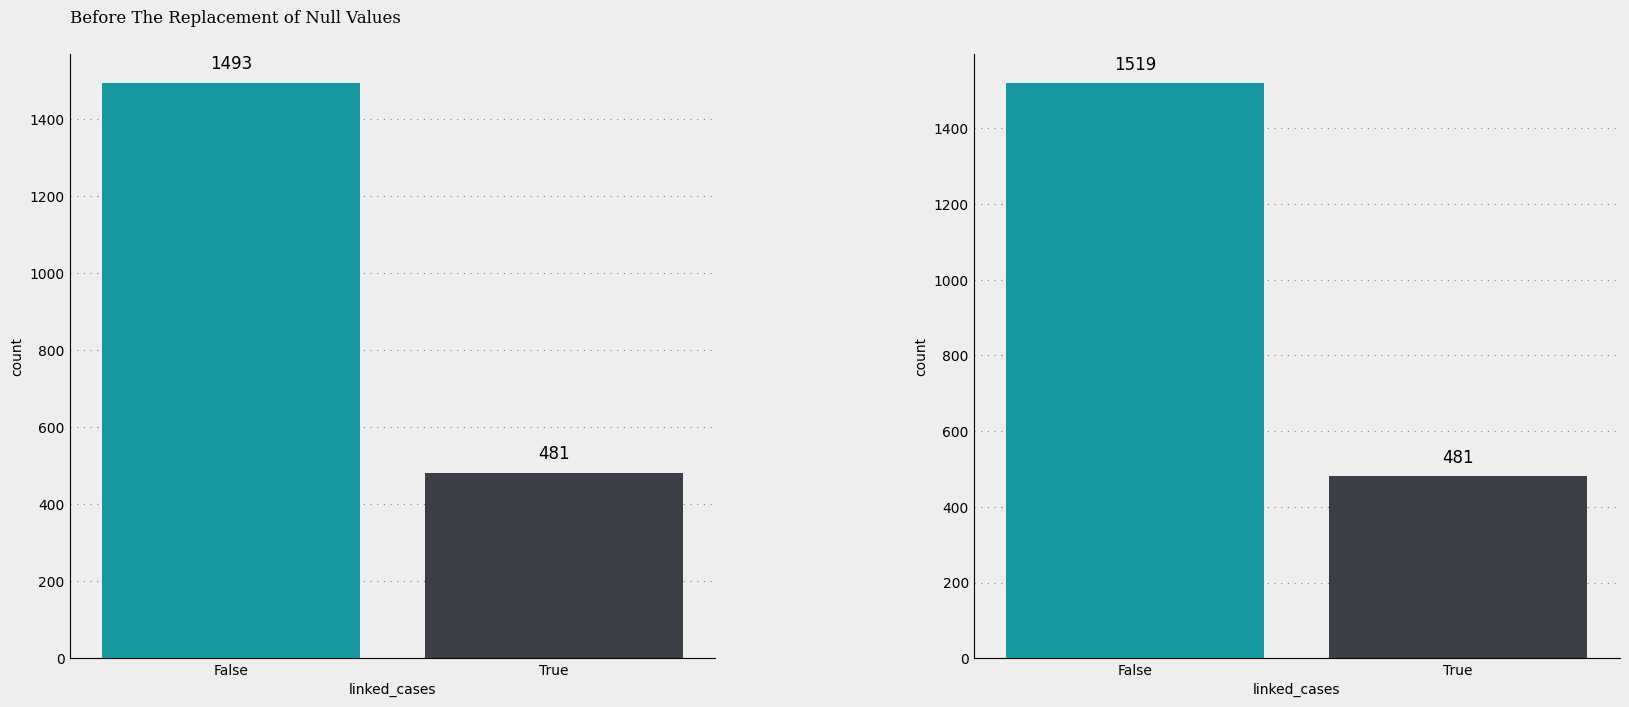

In [226]:
fig = plt.figure(figsize=(20, 8), dpi=100)

fig.patch.set_facecolor('#EEEEEE')
palette = ["#00ADB5", '#393E46']


gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.4, hspace=0.6)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


# AX0 (Countplot before null replace)
ax0.text(-0.5, 1650, 'Before The Replacement of Null Values',
         fontfamily='serif', fontsize=12, fontweight='light')
ax.grid(color='gray', linestyle=':', zorder=0, axis='y',  dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax0,palette=palette,zorder=3)

for i, j in enumerate(df['linked_cases'].value_counts()):
    ax0.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

# AX1 (Countplot after null replace)
# Replace Null
df['linked_cases'].fillna(df['linked_cases'][0], inplace=True)

for i, j in enumerate(df['linked_cases'].value_counts()):
    ax1.annotate(f'{j}', xy=(i, j+50), color='black',
                horizontalalignment='center', verticalalignment='center', fontsize=12)

ax1.grid(color='gray', linestyle=':', zorder=0, axis='y', dashes=(1, 5))
sns.countplot(x=df['linked_cases'],ax=ax1,palette=palette,zorder=3)



for s in ["top", "right"]:
    for i in range(0, 2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

for i in range(0, 2):
    locals()["ax"+str(i)].set_facecolor('#EEEEEE')
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both', length=0)
    locals()["ax"+str(i)].grid(color='gray', linestyle=':',
                               axis='y', zorder=0,  dashes=(1, 5))

locals()["ax"].tick_params(length=0)


### c. Describe what you did to make values match the description if they did not match.